In [1]:
import sys
sys.path.append('../')
import env

In [2]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

In [28]:
people='p10000'
ratio='r4'
seed='s123'
csv='mobile'

In [4]:
def create_base_dataframe():
    df = pd.DataFrame(columns=(['{0:02d}'.format(i*10) for i in range(env.AREA_ONE_LENGTH())]))
    return df

def create_empty_base():
    zeros = np.zeros(env.MAX_AREA_COUNT())
    df = pd.DataFrame(zeros, columns=(['{0:02d}'.format(i*10) for i in range(env.AREA_ONE_LENGTH())]))
    df = df.sort_index(ascending=False)
    return df

In [5]:
create_base_dataframe()

,00,10,20,30,40,50,60,70,80


In [6]:
# エリア番号を線形的な数から、iとjで回した数のようにする
def convert_area_to_contour(base, read):
    for r in np.asanyarray(read):
        area_id = int(r[1])
        row = str(area_id // env.AREA_ONE_LENGTH())
        col = str(area_id % env.AREA_ONE_LENGTH()) + '0'
        base.loc[row, col] = r[2]
        
    return base

In [7]:
csv_array = {}
def main(args, array):
    base = create_base_dataframe()
    df = pd.read_csv(env.get_full_path('2D', args),
                                                        encoding='Shift_JISx0213')
    df['time'] = df['time'].apply(lambda x: str(int(x)))

    group_list = df.groupby(['time'], sort=False)
    for _times, _group in group_list:
        df = convert_area_to_contour(base.copy(), _group.copy())
        df = df.sort_index(ascending=False)
        array[args.dir][args.ratio][args.seed][args.csv][_times] = df
        
env.for_default_init(main, csv_array, ['mobile', 'census', 'census1', 'census2', 'od'])

In [8]:
def create_contour(time_number, file_name=False):
    times_list = env.TIMES_LIST()
    time = times_list[time_number]
    print(time)
    df = csv_array[people][ratio][seed][csv][time].copy()
    
    plt.figure(figsize=(9,6))
    if file_name:
        plt.figure(figsize=(9,6), dpi=600)
        
#     sns.heatmap(df, annot=True, fmt='.0f', cmap='RdYlGn_r',
#                vmax=df.sum().mean(), vmin=0)
    sns.heatmap(df, annot=True, fmt='.0f', cmap='RdYlGn_r')
    if file_name:
        plt.savefig('{0}.png'.format(file_name))
        
    print(df.sum().sum())

In [9]:
def create_contour_base(df, file_name=False):
    plt.figure(figsize=(9,6))
    if file_name:
        plt.figure(figsize=(9,6), dpi=600)
        
    sns.heatmap(df, annot=True, fmt='.0f', cmap='RdYlGn_r',
               vmax=df.sum().mean(), vmin=0)
    if file_name:
        plt.savefig('{0}.png'.format(file_name))

In [10]:
def diff_contour(csv1, csv2, times_number):
    times_list = env.TIMES_LIST()
    _times = times_list[times_number]
    
    df1 = csv_array[people][ratio][seed][csv1][_times].copy()
    df2 = csv_array[people][ratio][seed][csv2][_times].copy()
    
    print(_times)
    plt.figure(figsize=(9,6))
    sns.heatmap(df1, annot=True, fmt='.0f', cmap='RdYlGn_r')
    print('csv1: ', df1.sum().sum())

    plt.figure(figsize=(9,6))
    sns.heatmap(df2, annot=True, fmt='.0f', cmap='RdYlGn_r')
    print('csv2: ', df2.sum().sum())

In [11]:
def diff_contour_percent(csv1, csv2, times_number):
    times_list = env.TIMES_LIST()
    _times = times_list[times_number]
    
    df1 = csv_array[people][ratio][seed][csv1][_times].copy()
    df2 = csv_array[people][ratio][seed][csv2][_times].copy()
    df1 /= df1.sum().sum()
    df2 /= df2.sum().sum()
    
    print(_times)
    plt.figure(figsize=(9,6))
    sns.heatmap(df1, annot=True, fmt='.2f', cmap='RdYlGn_r')
    print('csv1: ', df1.sum().sum())

    plt.figure(figsize=(9,6))
    sns.heatmap(df2, annot=True, fmt='.2f', cmap='RdYlGn_r')
    print('csv2: ', df2.sum().sum())

In [12]:
def substract_before(times_number):
    times_list = env.TIMES_LIST()
    now_times = times_list[times_number]
    next_times = times_list[times_number+1]
    
    df_now = csv_array[people][ratio][seed][csv][now_times].copy()
    df_next = csv_array[people][ratio][seed][csv][next_times].copy()
    print(now_times, ': ', df_now.sum().sum())
    print(next_times, ': ', df_next.sum().sum())
    
    df_sub = df_next - df_now
    create_contour_base(df_sub)

3600 :  1442.0
7200 :  3387.0


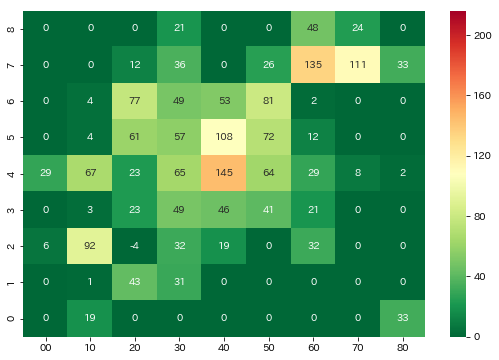

In [13]:
substract_before(0)

3600
csv1:  521.0
csv2:  962.0


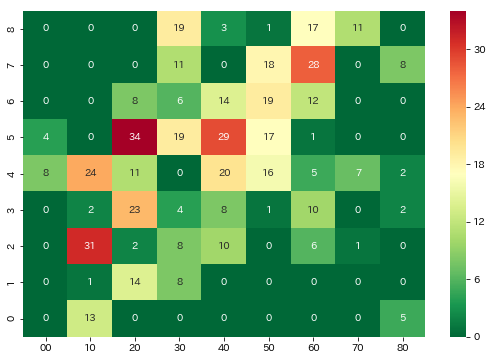

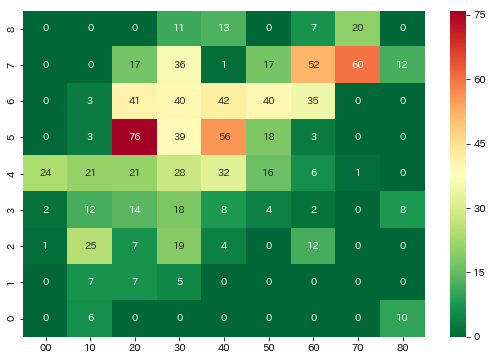

In [14]:
diff_contour('census1', 'census2', 0)

7200
csv1:  1169.0
csv2:  2305.0


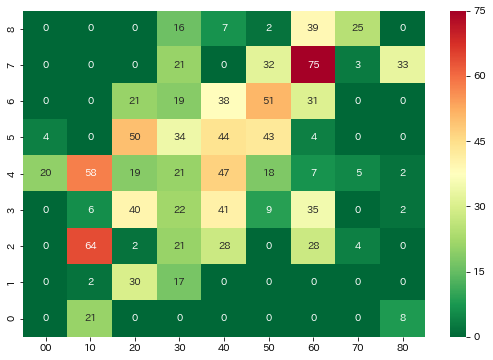

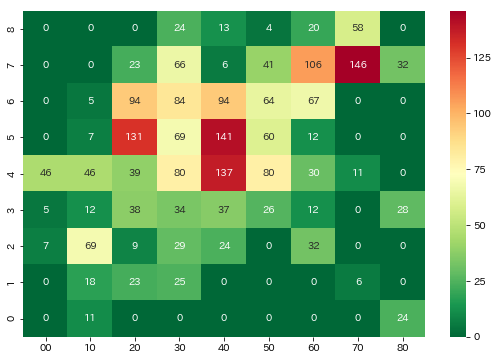

In [15]:
diff_contour('census1', 'census2', 1)

10800
csv1:  1217.0
csv2:  2420.0


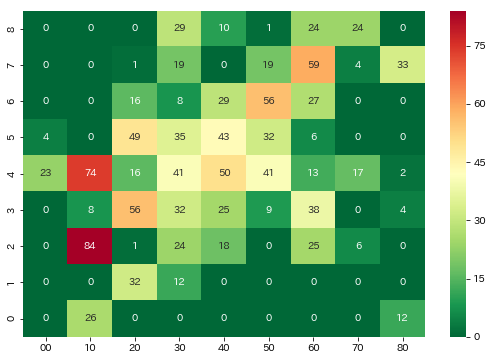

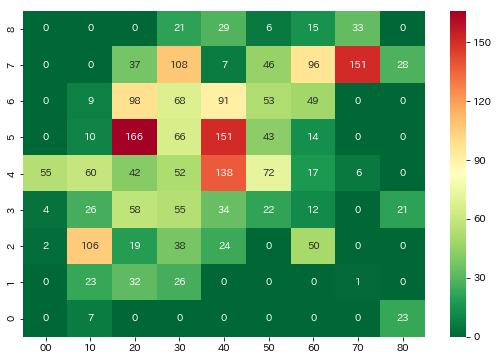

In [16]:
diff_contour('census1', 'census2', 2)

14400
csv1:  1138.0
csv2:  2279.0


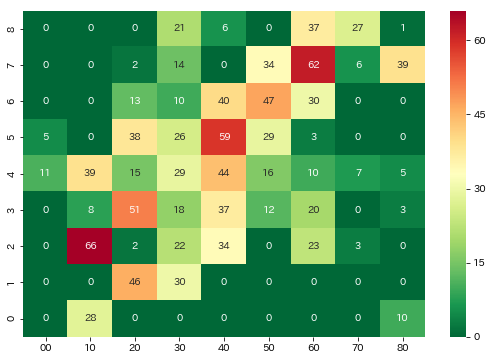

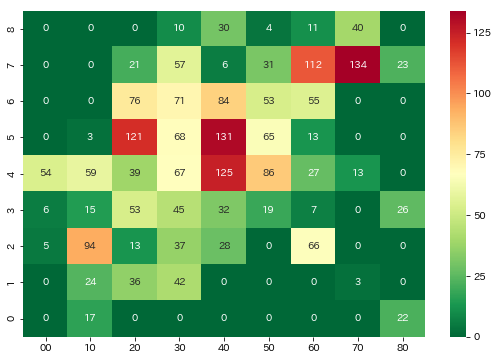

In [17]:
diff_contour('census1', 'census2', 3)

18000
csv1:  798.0
csv2:  1612.0


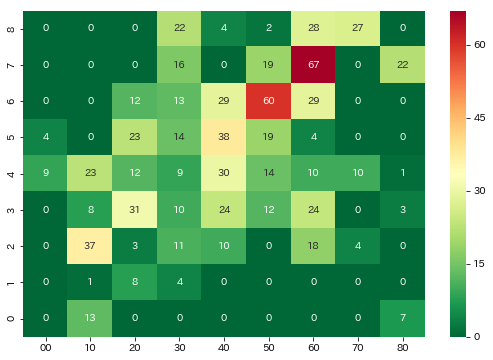

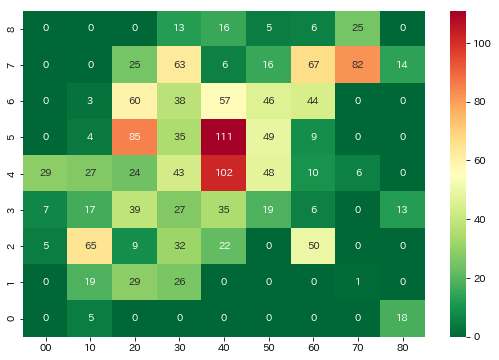

In [18]:
diff_contour('census1', 'census2', 4)

21600
csv1:  556.0
csv2:  1123.0


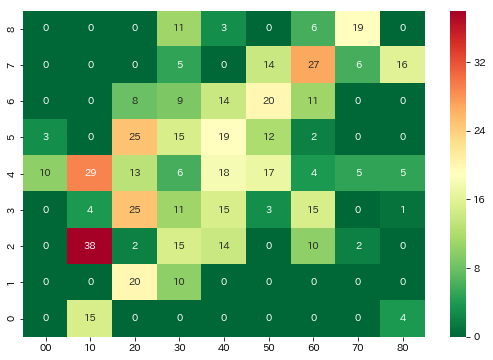

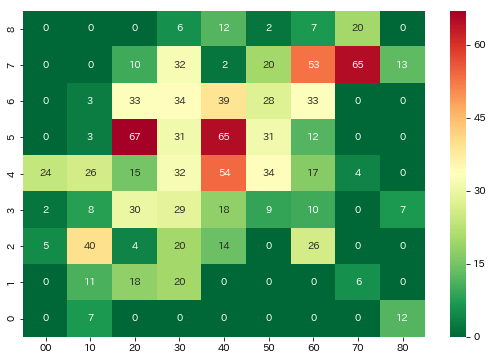

In [19]:
diff_contour('census1', 'census2', 5)

In [20]:
from sklearn.metrics import mean_squared_error

for _times in env.TIMES_LIST():
    df1 = csv_array[people][ratio][seed]['census1'][_times].copy()
    df2 = csv_array[people][ratio][seed]['census2'][_times].copy()

    df1 /= df1.sum().sum()
    df2 /= df2.sum().sum()

    mse = mean_squared_error(df1, df2)
    print(_times, ': ', np.sqrt(mse))

3600 :  0.01330679938629012
7200 :  0.01225635424085544
10800 :  0.012920507667946925
14400 :  0.011604934329861219
18000 :  0.013269364182668308
21600 :  0.011150693001927996


3600
305.0


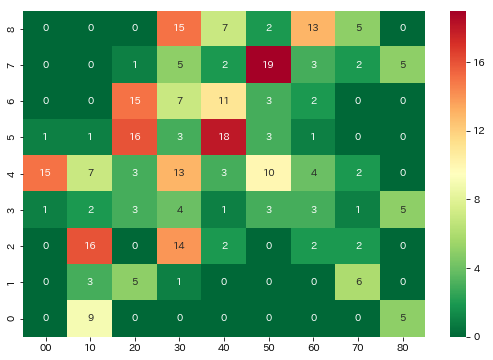

In [29]:
create_contour(0)

7200
655.0


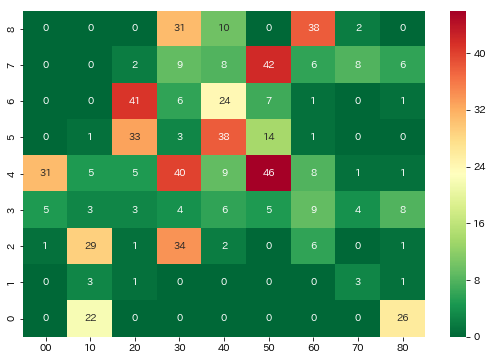

In [30]:
create_contour(1)

10800
698.0


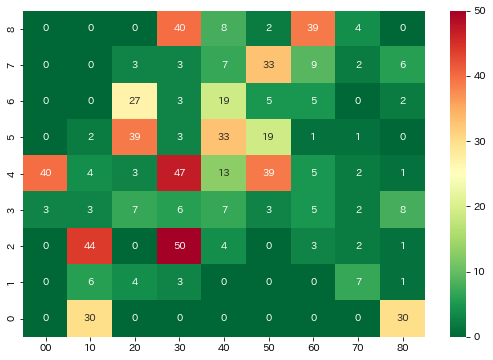

In [31]:
create_contour(2)

14400
3321.0


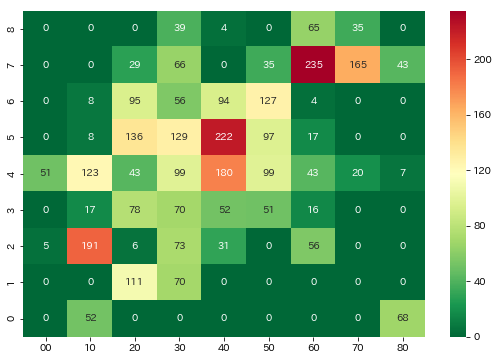

In [24]:
create_contour(3)

18000
2355.0


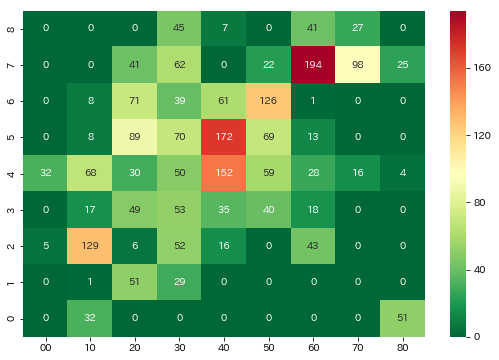

In [25]:
create_contour(4)

21600
1549.0


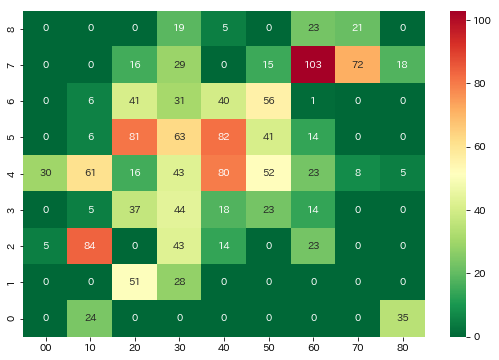

In [26]:
create_contour(5)

15590.0


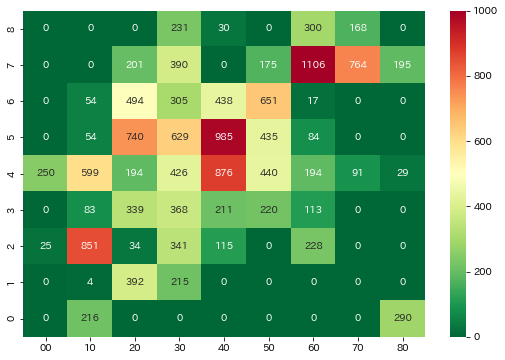

In [27]:
df_new = csv_array[people][ratio][seed][csv]['3600'].copy()
for _times in env.TIMES_LIST():
    if _times != '3600':
        df_new += csv_array[people][ratio][seed][csv][_times].copy()

print(df_new.sum().sum())
plt.figure(figsize=(9,6))
sns.heatmap(df_new, annot=True, fmt='.0f', cmap='RdYlGn_r',
           vmax=1000, vmin=0)
    
# create_contour(df_new, '{0}seed{1}_{2}'.format(people, seed, csv))